In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import scipy.optimize as scopt

plt.ion()
plt.rcParams['figure.figsize'] = 8, 6

In [112]:
# solve the system dy/dt = f(y, t)
def f(y, t, beta, gamma):
    Si, Ii, Ri = tuple(y)
    # SIR model equations
    # dS/dt = -beta * S * I
    # dI/dt = beta * S * I - gamma * I
    # dR/dt = gamma * I
    f0 = -beta*Si*Ii
    f1 = beta*Si*Ii - gamma*Ii
    f2 = gamma*Ii
    return np.array([f0, f1, f2])

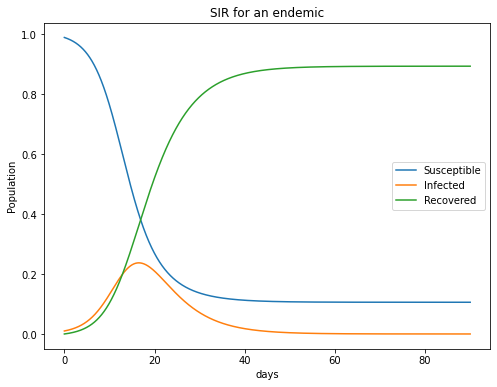

In [113]:
# initial conditions
I0 = 0.01     # initial number of infected people
S0 = 1.0 - I0  # initial number of susceptible people
R0 = 0.0        # initial number of recovered people
y0 = np.array([S0, I0, R0]) # initial condition vector

beta = 0.5 # rate of infection
gamma = 0.2  # rate of recovery

days = 90
resolution = 1000
t  = np.linspace(0, days, days * resolution) # time grid

# solve the DEs
sol = scint.odeint(f, y0, t, args=(beta, gamma))
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]
assert np.allclose(sol.sum(axis=1), 1.)

# plot results
plt.figure()
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('days')
plt.ylabel('Population')
plt.title('SIR for an endemic')
plt.legend(loc=0)
plt.show()

beta, gamma guess 1.5541063404737374 0.41776911145202683
[1.55410634 0.41776911] [[0.00053253 0.00012577]
 [0.00012577 0.00019908]]
beta, gamma 1.5541063404737374 0.41776911145202683


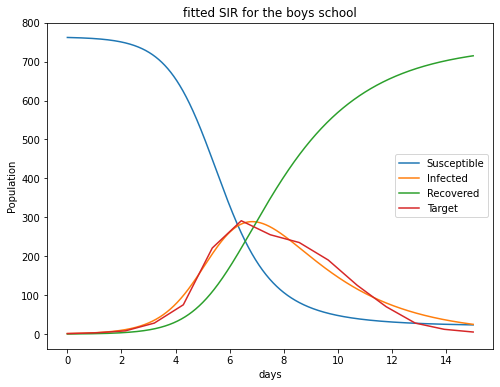

In [168]:
### initial conditions
total = 763.0
I0 = 1.0     # a single boy was infected
S0 = total - I0  # initial number of susceptible people
R0 = 0.0        # initial number of recovered people

# total = 1.0
I0 = 1.0/total     # initial number of infected people
S0 = 1.0 - I0  # initial number of susceptible people
R0 = 0.0        # initial number of recovered people

y0 = np.array([S0, I0, R0])

days = 15
t = np.linspace(0, days, days * 1) # time grid
tt = np.linspace(0, days, days * 100) # time grid

target_solution = np.array([
    1, 3,8,28,75,221,291,255,235,190,125,70,28,12,5
])

#def f3(params):
#    # print(params)
#    beta, gamma = params
#    sol = scint.odeint(f, y0, t, args=(beta, gamma))
#    # print(sol[:,1].shape)
#    # print(target_solution.shape)
#    delta = sol[:,1] - target_solution
#    print(delta)
#    # print(np.linalg.norm(delta))
#    return np.linalg.norm(delta);
# guess = [0.5, 0.2]

def f2(t, beta, gamma):
    #print(t)
    #print(params)
    #beta, gamma = params
    return scint.odeint(f, y0, t, args=(beta, gamma))[:,1] * total
    # tspan = np.hstack([[0],np.hstack([t])])
    # return scint.odeint(pend, y0, tspan, args=(b,c))[1:,0]

def mse_error(params):
    beta, gamma = params
    sol = scint.odeint(f, y0, t, args=(beta, gamma))[:,1] * total
    delta = target_solution - sol
    # print(np.linalg.norm(delta))
    # print(np.sum(delta ** 2.0))
    return np.sum(delta ** 2.0)

bounds = [[0,2], [0,2]]
guess = scopt.differential_evolution(mse_error, bounds, seed=3)
beta, gamma = guess.x
print("beta, gamma guess", beta, gamma)

# print(res.x)
# res = scopt.minimize(f2, x0=np.array(guess), tol=20.0

# popt, pcov = scopt.curve_fit(f, t, sol[:,0], p0=guess)
# (beta, gamma), _ = scopt.leastsq(f_resid, x0=guess, xtol=1.0)
# beta, gamma = [1.5, 0.4]
fitted, pcov = scopt.curve_fit(f2, t, target_solution, p0=(beta, gamma), xtol=0.001)
print(fitted, pcov)
beta, gamma = fitted
print("beta, gamma", beta, gamma)
# print(c)
# print(kvg)
# res = scopt.minimize(f2, x0=np.array(guess), tol=20.0)
# print(res)
# beta, gamma = res.x

t = np.linspace(0, days, days * 1) # time grid
sol = scint.odeint(f, y0, tt, args=(beta, gamma)) * total
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]
# print(np.linalg.norm(I - target_solution))
assert np.allclose(sol.sum(axis=1), total)

# plot results
plt.figure()
plt.plot(tt, S, label='Susceptible')
plt.plot(tt, I, label='Infected')
plt.plot(tt, R, label='Recovered')
plt.plot(np.linspace(0, days, days), target_solution, label='Target')
plt.xlabel('days')
plt.ylabel('Population')
plt.title('fitted SIR for the boys school')
plt.legend(loc=0)
plt.show()